# Proyek Analisis Data: Nama dataset
- Nama: Evlin Sitanggang
- Email: evelinsitanggang@gmail.com
- Id Dicoding: evlinzxxx

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak mendapatkan review baik dan kurang baik dari pembeli?
- Produk apa yang paling laris dan kurang laris di E-commerce?
- Pada tahun 2018 produk kategori apa yang paling banyak diminati pembeli?
- Pendapatan tertinggi terjadi pada tahun berapa?

## Menyaipkan semua library yang dibuthkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [4]:
# User Dataset
sellers = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/sellers_dataset.csv")
customers = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/customers_dataset.csv")
geolocation = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/geolocation_dataset.csv")

# Order Dataset
order_items = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/order_items_dataset.csv")
order_payments = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/order_reviews_dataset.csv")
orders = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/orders_dataset.csv")

# Product Dataset
product_category = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/product_category_name_translation.csv")
products = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/products_dataset.csv")

### Assessing Data

####1. Data Sellers

In [5]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Data Seller tidak ada jumlah yang salah dan type data yang salah

In [6]:
print("Duplikasi Data: ",sellers.duplicated().sum())

Duplikasi Data:  0


Tidak ada data seller yang terduplikasi

In [7]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Tidak ada data seller yang kosong / *missing value*

In [8]:
sellers.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Tidak terdapat keanenahan berdasarkan statistik deskriptif dalam data seller

####2. Data Customer

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Data Customer tidak ada jumlah yang salah dan type data yang salah

In [10]:
print("Duplikasi Data : ", customers.duplicated().sum())

Duplikasi Data :  0


Tidak ada data customer yang terduplikasi

In [11]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Tidak ada data customer yang kosong / *missing value*

In [12]:
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Data Customer tidak ada jumlah data yang salah dan type data yang salah

####3. Data Geolocation

In [13]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Data Geolocation tidak ada jumlah yang salah dan type data yang salah

In [14]:
print("Duplikasi Data : ", geolocation.duplicated().sum())

Duplikasi Data :  261831


Terdapat 261831 data geolocation yang terduplikasi

In [15]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Tidak terdapat data kosong atau *missing value* pada data geolocation

In [16]:
geolocation.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Data Geolocation tidak ada jumlah data yang salah dan type data yang salah

####4. Data Order Item

In [17]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat kesalahan tipe data pada kolom **shipping_limit_date** yang seharusnya direpresentasikan dengan tipe data **datetime** bukan object pada data order item

In [18]:
print("Duplikasi Data : ", order_items.duplicated().sum())

Duplikasi Data :  0


Tidak ada data order item yang terduplikasi

In [19]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak ada data order item yang kosong atau *missing value*

In [20]:
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Data Order Item tidak ada jumlah yang salah dan type data yang salah

####5. Data Order Payments

In [21]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Data Order Payments tidak ada jumlah yang salah dan type data yang salah

In [22]:
print("Duplikasi Data : ", order_payments.duplicated().sum())

Duplikasi Data :  0


Tidak terjadi duplikasi data pada data order payment

In [23]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Tidak ada data yang kosong atau *missing value* pada data order payments

In [24]:
order_payments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Data Order Payments tidak ada jumlah yang salah dan type data yang salah

####6. Order Reviews

In [25]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat kesalahan tipe data pada kolom **review_creation_date** dan **review_answer_timestamp** yang seharusnya direpresentasikan dengan tipe data **datetime** bukan object pada data order review



In [26]:
print("Duplikasi Data : ", order_reviews.duplicated().sum())

Duplikasi Data :  0


Tidak ada duplikasi data pada data order review

In [27]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat *missing value* pada kolom **review_comment_title** sebanyak **87.656** dan **review_comment**_message sebanyak **58.247**

In [28]:
order_reviews.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Data Order Review tidak ada jumlah yang salah dan type data yang salah

####7. Data Orders

In [29]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data pada kolom **order_purchase_timestamp** , **order_delivered_carrier_date**, **order_delivered_customer_date** dan  **order_estimated_delivery_date** yang seharusnya direpresentasikan dengan tipe data **datetime** bukan object pada data order

In [30]:
print("Duplikasi Data : ", orders.duplicated().sum())

Duplikasi Data :  0


Tidak ada duplikasi data pada data order

In [31]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat *missing value* pada kolom **order_approved_at** sebanyak **160**, **order_delivered_carrier_date** sebanyak **1783** dan
**order_delivered_customer_date** sebanyak **2965**.

In [32]:
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Data Order tidak ada jumlah yang salah dan type data yang salah

####8. Data Product Category

In [33]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Data Product Category tidak ada jumlah yang salah dan type data yang salah

In [34]:
print("Duplikasi Data : ", product_category.duplicated().sum())

Duplikasi Data :  0


Tidak ada duplikasi data pada data product category

In [35]:
product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Tidak ada data product category yang kosong atau *missing value*

In [36]:
product_category.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Data Product Category tidak ada jumlah yang salah dan type data yang salah

####9. Data Products

In [37]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Data Products tidak ada jumlah yang salah dan type data yang salah

In [38]:
print("Duplikasi Data : ", products.duplicated().sum())

Duplikasi Data :  0


Tidak ada duplikasi data pada data products

In [39]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat missing value pada kolom **product_category_name**   sebanyak      **610**
**product_name_lenght**    sebanyak       **610**,
**product_description_lenght**  sebanyak  **610**,
**product_photos_qty**    sebanyak       **610**,
**product_weight_g**       sebanaak         **2**,
**product_length_cm**     sebanyak          **2**,
**product_height_cm**      sebanyak         **2** dan
**product_width_cm**         sebanyak       **2**

In [40]:
products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Tidak terdapat keanenahan berdasarkan statistik deskriptif dalam data products

### Cleaning Data

####1. Mengubah Tipe Data
Mengubah tipe data **datetime** untuk dataset **order_items**, **order_reviews** dan **orders**

In [41]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [42]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [77]:
order_items.to_csv('order_items.csv', index=False)

Tipe data untuk **shipping_limit_date** sudah berubah ke **datetime**

In [43]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews[column] = pd.to_datetime(order_reviews[column])

In [44]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Tipe data untuk **review_creation_date** dan **review_answer_timestamp** sudah berubah ke **datetime**

In [45]:
datetime_columns = ["order_purchase_timestamp" , "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders[column] = pd.to_datetime(orders[column])

In [46]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


Tipe data untuk **order_purchase_timestamp**,  **order_delivered_carrier_date**   , **order_delivered_customer_date**  dan  **order_estimated_delivery_date**

sudah berubah ke **datetime**

####2. Mengatasi *Missing Value*
Mengatasi data yang kosong atau missing value pada dataset **order_reviews**, **orders** dan **products**.

In [47]:
# Mengisi kolom yang kosong dengan sebuah pesan
order_reviews['review_comment_title'].fillna(value="No Title", inplace=True)
order_reviews['review_comment_message'].fillna(value="No Comment", inplace=True)

In [48]:
order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Tidak ada lagi data yang kosong atau *missing value* pada data order reviews

In [49]:
# Filter kolom yang kosong pada data orders
column = orders[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().any(axis=1)

# Tambah 10 menit ke order_purchase_timestamp yang tidak kosong
orders.loc[column, ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']] = (
    pd.to_datetime(orders.loc[column, 'order_purchase_timestamp']) + pd.to_timedelta('10 minutes')
)

In [50]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Tidak ada lagi data yang kosong atau *missing value* pada data orders

In [51]:
# Menghapus data produk yang kosong atau missing
products.dropna(inplace=True)

In [52]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Tidak ada lagi data products yang kosong atau *missing value*

## Exploratory Data Analysis (EDA)

### Explore ...

####1. Mempersiapkan data untuk melihat kategori produk yang memiliki review baik dan kurang baik
Menggabungkan data **order_reviews**, **order_items** dan **products**

In [53]:
order_reviews_df = pd.merge(
    left=order_reviews,
    right=order_items,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,No Title,No Comment,2018-01-18,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,No Title,No Comment,2018-01-18,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,No Title,No Comment,2018-03-10,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5.0,No Title,No Comment,2018-02-17,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,No Title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


In [69]:
order_reviews_df = pd.merge(
    left=order_reviews_df,
    right=products,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,product_height_cm_x,product_width_cm_x,product_category_name_y,product_name_lenght_y,product_description_lenght_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,No Title,No Comment,2018-01-18,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,30.0,35.0,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,No Title,No Comment,2018-01-18,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,30.0,35.0,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,e2655da8bccce2ddc2f43cc2c80d24f3,19721d59a9764437477eff0730b48665,5.0,No Title,No Comment,2018-04-10,2018-04-11 11:30:43,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,30.0,35.0,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
3,cb18f53b563f0bdeb76be0376ddd6b6a,efd626e6a12a82d76e456e34093f8356,5.0,No Title,No Comment,2017-12-28,2017-12-30 12:07:50,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,...,30.0,35.0,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
4,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,No Title,No Comment,2018-03-10,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,...,14.0,14.0,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0


In [55]:
# Filter baris dengan rating 5 dan 1
best_review = order_reviews_df[order_reviews_df['review_score'] == 5]
worst_review = order_reviews_df[order_reviews_df['review_score'] == 1]

# Kemudian, kelompokkan produk yang memiliki rating 5 dan 1 berdasarkan 'product_id'
best_review = best_review.groupby(['review_score', 'product_category_name']).size().reset_index(name='count')
worst_review = worst_review.groupby(['review_score', 'product_category_name']).size().reset_index(name='count')

# Urutkan dari yang terbanyak
best_review_sorted = best_review.sort_values(by='count', ascending=False).head(5)
worst_review_sorted = worst_review.sort_values(by='count', ascending=False).head(5)

best_review = pd.merge(best_review_sorted, product_category, on='product_category_name', how='inner')
worst_review = pd.merge(worst_review_sorted, product_category, on='product_category_name', how='inner')
best_review

,review_score,product_category_name,count,product_category_name_english
0,5.0,beleza_saude,5858,health_beauty
1,5.0,cama_mesa_banho,5785,bed_bath_table
2,5.0,esporte_lazer,5121,sports_leisure
3,5.0,moveis_decoracao,4452,furniture_decor
4,5.0,informatica_acessorios,4200,computers_accessories


In [56]:
worst_review

,review_score,product_category_name,count,product_category_name_english
0,1.0,cama_mesa_banho,1614,bed_bath_table
1,1.0,moveis_decoracao,1260,furniture_decor
2,1.0,informatica_acessorios,1174,computers_accessories
3,1.0,beleza_saude,1081,health_beauty
4,1.0,esporte_lazer,1028,sports_leisure


####2. Mempersiapkan data untuk melihat produk yang paling laris dan kurang laris
Menggabungkan data **order_items** dan **products**

In [57]:
order_tren_df = pd.merge(
    left=order_items,
    right=products,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
order_tren_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [58]:
# Kemudian, kelompokkan produk berdasarkan kategori
order = order_tren_df.groupby(['product_category_name']).size().reset_index(name='count')

# Urutkan nilai kategori dari yang terbanyak
most_order_sorted = order.sort_values(by='count', ascending=False)
least_order_sorted = order.sort_values(by='count', ascending=True)

most_order = pd.merge(most_order_sorted, product_category, on='product_category_name', how='inner')
least_order = pd.merge(least_order_sorted, product_category, on='product_category_name', how='inner')

most_order

,product_category_name,count,product_category_name_english
0,cama_mesa_banho,11115,bed_bath_table
1,beleza_saude,9670,health_beauty
2,esporte_lazer,8641,sports_leisure
3,moveis_decoracao,8334,furniture_decor
4,informatica_acessorios,7827,computers_accessories
...,...,...,...
66,artes_e_artesanato,24,arts_and_craftmanship
67,cds_dvds_musicais,14,cds_dvds_musicals
68,la_cuisine,14,la_cuisine
69,fashion_roupa_infanto_juvenil,8,fashion_childrens_clothes


In [59]:
least_order

,product_category_name,count,product_category_name_english
0,seguros_e_servicos,2,security_and_services
1,fashion_roupa_infanto_juvenil,8,fashion_childrens_clothes
2,la_cuisine,14,la_cuisine
3,cds_dvds_musicais,14,cds_dvds_musicals
4,artes_e_artesanato,24,arts_and_craftmanship
...,...,...,...
66,informatica_acessorios,7827,computers_accessories
67,moveis_decoracao,8334,furniture_decor
68,esporte_lazer,8641,sports_leisure
69,beleza_saude,9670,health_beauty


####3. Mempersiapkan data *most category product* yang banyak dibeli *customers* tahun 2018
Menggabungkan data **order_tren_df** dan **product_category**

In [67]:
category_tren_df = pd.merge(
    left=order_tren_df,
    right=product_category,
    how="outer",
    left_on="product_category_name",
    right_on="product_category_name"
)
category_tren_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [61]:
# Kategori tahun 2018
order_2018 = (category_tren_df['shipping_limit_date'].dt.year == 2018)

# Mengambil data shipping_limit_date dengan tahun 2018
order_2018 = category_tren_df[order_2018]

most_order_2018 = order_2018.groupby(['product_category_name']).size().reset_index(name='count')
most_order_2018_sorted = most_order_2018.sort_values(by='count', ascending=False)

most_order = pd.merge(most_order_2018_sorted, product_category, on='product_category_name', how='inner').head(5)
most_order

,product_category_name,count,product_category_name_english
0,beleza_saude,6029,health_beauty
1,cama_mesa_banho,5989,bed_bath_table
2,informatica_acessorios,4764,computers_accessories
3,esporte_lazer,4584,sports_leisure
4,moveis_decoracao,4207,furniture_decor


###4. Mempersiapkan data order item untuk melihat jumlah pendapatan tertinggi


In [62]:
# Ekstrak tahun dari kolom 'shipping_limit_date' dan simpan dalam kolom baru 'tahun'
order_items['tahun'] = order_items['shipping_limit_date'].dt.year

# Hitung nilai price berdasarkan tahun
value_price_per_year = order_items.groupby('tahun')['price'].sum().reset_index()

# Menampilkan hasil
value_price_per_year

,tahun,price
0,2016,49785.92
1,2017,6034868.58
2,2018,7506643.24
3,2020,345.96


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling banyak mendapatkan review baik dan kurang baik dari pembeli?

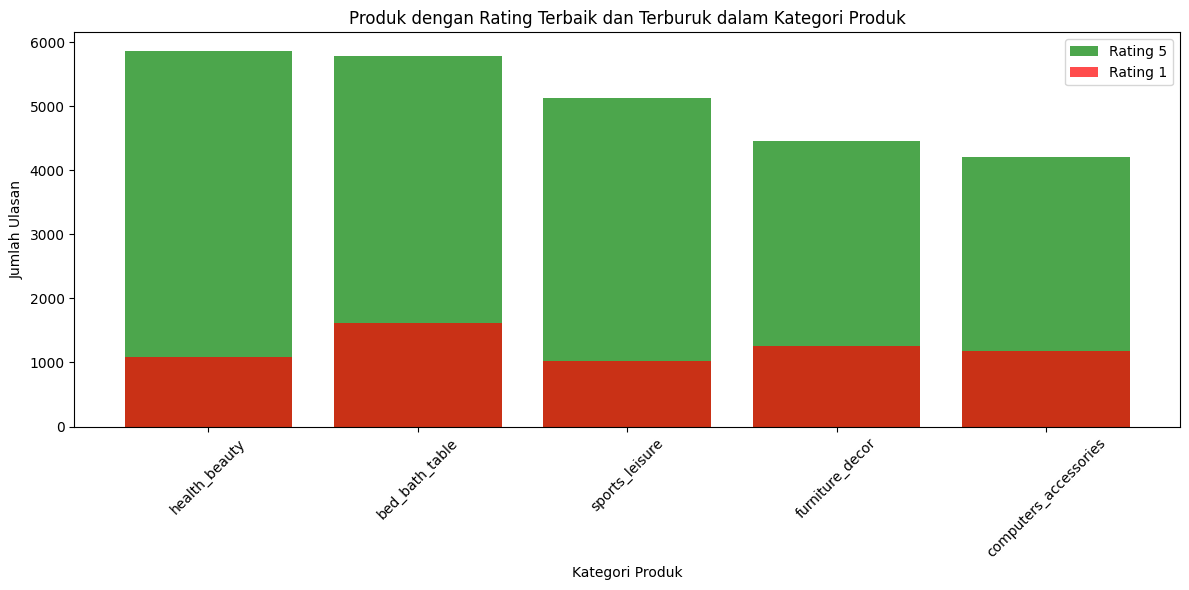

In [63]:
# Membuat plot bar untuk best_review
plt.figure(figsize=(12, 6))
plt.bar(best_review['product_category_name_english'], best_review['count'], color='green', alpha=0.7, label='Rating 5')

# Membuat plot bar untuk worst_review
plt.bar(worst_review['product_category_name_english'], worst_review['count'], color='red', alpha=0.7, label='Rating 1')

plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Ulasan')
plt.title('Produk dengan Rating Terbaik dan Terburuk dalam Kategori Produk')
plt.xticks(rotation=45)
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

### Pertanyaan 2 : Produk apa yang paling laris dan kurang laris di E-commerce?

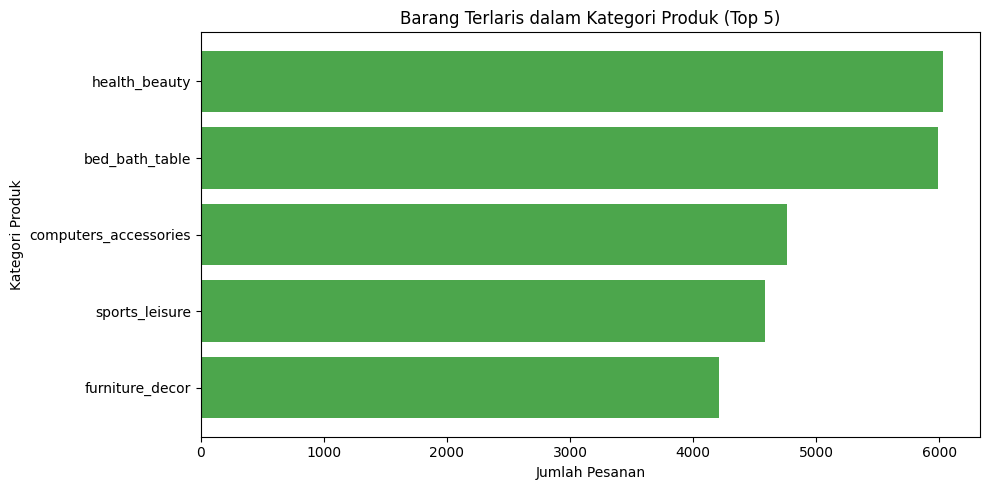

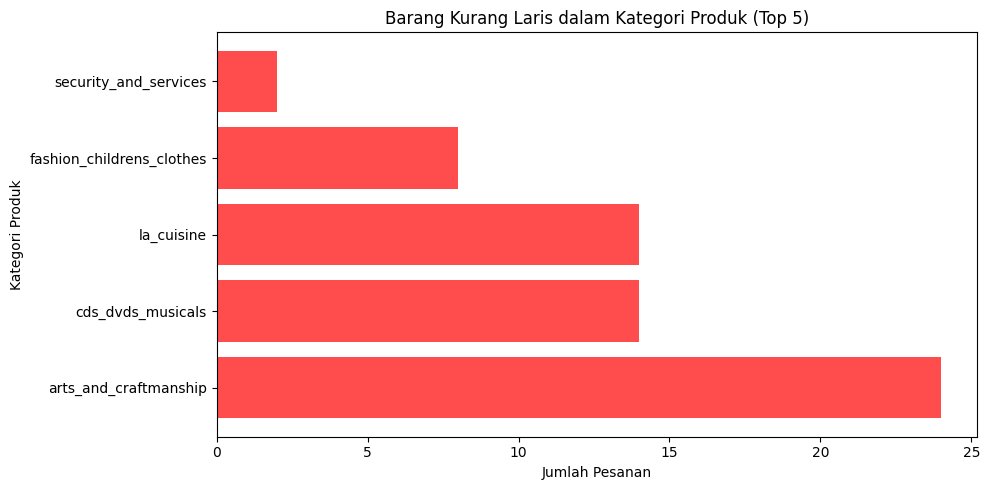

In [64]:
# Mengambil 5 data teratas dari DataFrame most_order dan least_order dengan urutan terbalik
top_5_most_order = most_order.head(5).iloc[::-1]
top_5_least_order = least_order.head(5).iloc[::-1]

# Plot barang terlaris (most order) untuk 5 data tersebut (horizontal bar plot)
plt.figure(figsize=(10, 5))
plt.barh(top_5_most_order['product_category_name_english'], top_5_most_order['count'], color='green', alpha=0.7)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.title('Barang Terlaris dalam Kategori Produk (Top 5)')
plt.tight_layout()

# Menampilkan plot barang terlaris (Top 5) dalam bentuk horizontal bar plot
plt.show()

# Plot barang kurang laris (least order) (horizontal bar plot)
plt.figure(figsize=(10, 5))
plt.barh(top_5_least_order['product_category_name_english'], top_5_least_order['count'], color='red', alpha=0.7)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.title('Barang Kurang Laris dalam Kategori Produk (Top 5)')
plt.tight_layout()

# Menampilkan plot barang kurang laris dalam bentuk horizontal bar plot
plt.show()


###Pertanyaan 3 : Pada tahun 2018 produk kategori apa yang paling banyak diminati pembeli?

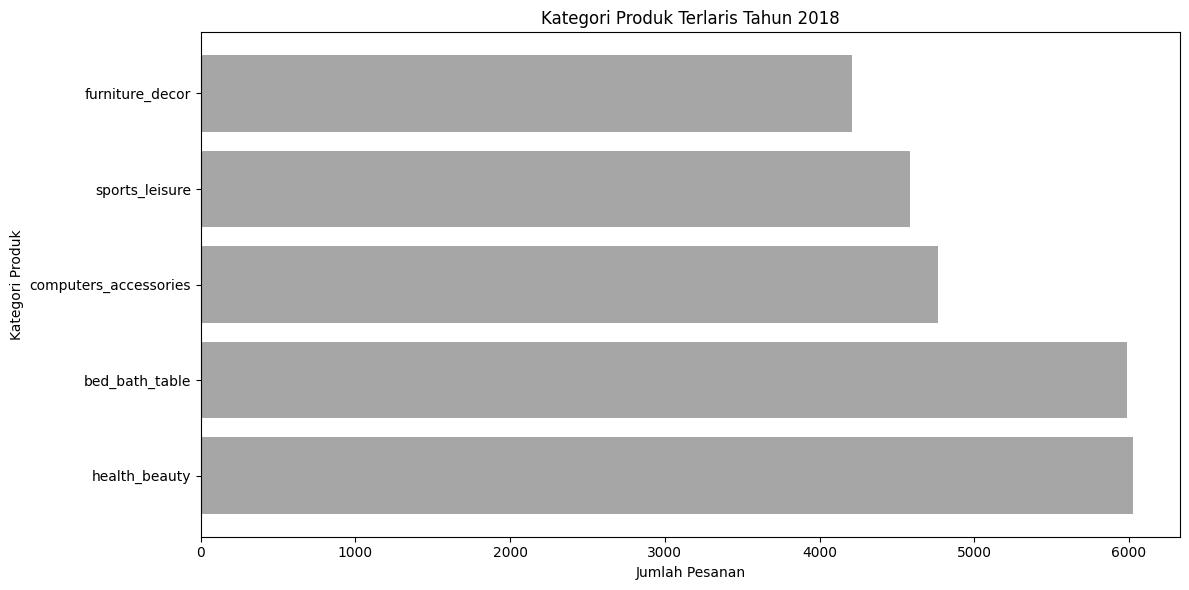

In [65]:
# Plot kategori produk terlaris pada tahun 2018
plt.figure(figsize=(12, 6))
plt.barh(most_order['product_category_name_english'], most_order['count'], color='grey', alpha=0.7)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.title('Kategori Produk Terlaris Tahun 2018')
plt.tight_layout()

# Menampilkan plot kategori produk terlaris
plt.show()

###Pertanyaan 4 : Pendapatan tertinggi terjadi pada tahun berapa?

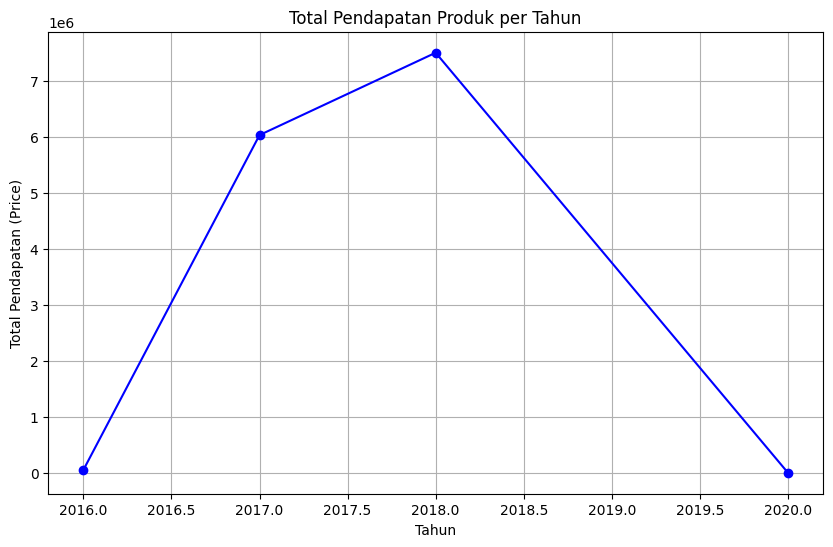

In [66]:
# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(value_price_per_year['tahun'], value_price_per_year['price'], marker='o', color='blue', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('Total Pendapatan (Price)')
plt.title('Total Pendapatan Produk per Tahun')
plt.grid(True)

# Menampilkan line chart
plt.show()

## Conclusion

###**Kategori produk apa yang paling banyak mendapatkan review baik dan kurang baik dari pembeli?**
####Berdasarkan hasil visualisasi data yang sudah didapatkan, terlihat bahwa kategori produk yang paling banyak mendapatkan review baik adalah **Health Beauty** dengan total nilai **rating score 5.0** sebanyak **5858** dan produk yang mendapatkan review kurang baik dari pembeli adalah **Bed Bath Table** dengan total nilai **rating score 1.0** sebanyak **1614**.



###**Produk apa yang paling laris dan kurang laris di E-commerce?**
####Berdasarkan hasil visualisasi data yang sudah didapatkan, terlihat bahwa produk yang paling banyak dibeli atau paling laris adalah dari kategori **Bed Bath Table** dengan total order sebanyak **11.115** item dan produk yang paling jarang dibeli atau paling kurang laris adalah **Security and Services** dengan total order sebanyak **2** item.


###**Pada tahun 2018 produk kategori apa yang paling banyak diminati pembeli?**
####Pada tahun 2018 kategori produk yang paling banyak dibeli atau paling banyak peminatnya adalah kategori **Health Beauty** dengan total order sebanyak **6029** item.

###**Pendapatan tertinggi terjadi pada tahun berapa?**
####Berdasarkan data yang sudah diolah, terlihat bahwa pendapatan paling banyak dari rentang 2016 sampai 2020 adalah pada tahun **2018** yaitu sebesar **7506643.24 euro**